In [1]:
import pickle
import numpy as np

In [2]:
with open('/Users/sabinkakotsur/Desktop/UPDATED_NLP_COURSE-3/06-Deep-Learning/train_qa.txt', 'rb') as f:
    train_data = pickle.load(f)
    

In [3]:
with open('/Users/sabinkakotsur/Desktop/UPDATED_NLP_COURSE-3/06-Deep-Learning/test_qa.txt', 'rb') as f:
    test_data = pickle.load(f)

In [4]:
type(test_data)

list

In [5]:
len(train_data)

10000

In [6]:
train_data[0]

(['Mary',
  'moved',
  'to',
  'the',
  'bathroom',
  '.',
  'Sandra',
  'journeyed',
  'to',
  'the',
  'bedroom',
  '.'],
 ['Is', 'Sandra', 'in', 'the', 'hallway', '?'],
 'no')

In [7]:
' '.join(train_data[0][0])

'Mary moved to the bathroom . Sandra journeyed to the bedroom .'

In [8]:
' '.join(train_data[0][1])

'Is Sandra in the hallway ?'

In [9]:
all_data = test_data + train_data

In [10]:
len(all_data)

11000

In [11]:
train_data[0][0]

['Mary',
 'moved',
 'to',
 'the',
 'bathroom',
 '.',
 'Sandra',
 'journeyed',
 'to',
 'the',
 'bedroom',
 '.']

In [12]:
vocab = set()

for story,question,answer in all_data:
    vocab = vocab.union(set(story))
    vocab = vocab.union(set(question))

In [13]:
vocab.add('no')

In [14]:
vocab.add('yes')

In [15]:
vocab

{'.',
 '?',
 'Daniel',
 'Is',
 'John',
 'Mary',
 'Sandra',
 'apple',
 'back',
 'bathroom',
 'bedroom',
 'discarded',
 'down',
 'dropped',
 'football',
 'garden',
 'got',
 'grabbed',
 'hallway',
 'in',
 'journeyed',
 'kitchen',
 'left',
 'milk',
 'moved',
 'no',
 'office',
 'picked',
 'put',
 'the',
 'there',
 'to',
 'took',
 'travelled',
 'up',
 'went',
 'yes'}

In [16]:
vocab_len = len(vocab) + 1

In [17]:
# the longest story

all_story_len=[len(data[0]) for data in all_data]


In [18]:
all_story_len

[12,
 23,
 35,
 47,
 59,
 13,
 26,
 37,
 50,
 62,
 12,
 24,
 37,
 49,
 60,
 12,
 25,
 38,
 50,
 62,
 12,
 24,
 36,
 47,
 59,
 12,
 25,
 36,
 48,
 59,
 12,
 26,
 39,
 51,
 63,
 13,
 24,
 37,
 50,
 62,
 13,
 26,
 38,
 50,
 63,
 13,
 25,
 36,
 49,
 61,
 13,
 26,
 39,
 51,
 64,
 13,
 25,
 37,
 50,
 62,
 13,
 25,
 37,
 50,
 61,
 12,
 25,
 38,
 50,
 62,
 12,
 25,
 37,
 50,
 61,
 12,
 25,
 36,
 48,
 60,
 12,
 24,
 36,
 48,
 60,
 13,
 25,
 37,
 49,
 60,
 13,
 25,
 39,
 51,
 64,
 12,
 25,
 37,
 49,
 61,
 12,
 25,
 38,
 50,
 61,
 12,
 24,
 36,
 49,
 62,
 13,
 25,
 37,
 50,
 62,
 12,
 23,
 35,
 47,
 59,
 12,
 25,
 37,
 48,
 73,
 12,
 24,
 37,
 49,
 61,
 12,
 24,
 37,
 49,
 62,
 14,
 26,
 37,
 49,
 62,
 12,
 23,
 35,
 48,
 59,
 12,
 24,
 36,
 49,
 61,
 13,
 25,
 37,
 49,
 61,
 12,
 25,
 37,
 50,
 62,
 12,
 24,
 36,
 47,
 58,
 12,
 24,
 36,
 48,
 61,
 25,
 38,
 50,
 62,
 74,
 13,
 25,
 37,
 49,
 62,
 12,
 24,
 37,
 49,
 62,
 12,
 24,
 36,
 48,
 60,
 12,
 24,
 36,
 48,
 61,
 12,
 25,
 36,
 50,
 62,


In [19]:
max_story_len = max(all_story_len)

In [20]:
max_question_len = max([len(data[1]) for data in all_data])

In [21]:
max_question_len

6

In [22]:
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer

In [23]:
tokenizer = Tokenizer(filters=[])
tokenizer.fit_on_texts(vocab)

In [24]:
tokenizer.word_index

{'down': 1,
 'hallway': 2,
 'got': 3,
 '?': 4,
 'bathroom': 5,
 'took': 6,
 'left': 7,
 'dropped': 8,
 'picked': 9,
 'put': 10,
 'garden': 11,
 'discarded': 12,
 'the': 13,
 'john': 14,
 'there': 15,
 'grabbed': 16,
 'office': 17,
 'travelled': 18,
 'moved': 19,
 'apple': 20,
 'back': 21,
 'journeyed': 22,
 'kitchen': 23,
 'mary': 24,
 'to': 25,
 'in': 26,
 'went': 27,
 'no': 28,
 'sandra': 29,
 'up': 30,
 'daniel': 31,
 '.': 32,
 'yes': 33,
 'football': 34,
 'bedroom': 35,
 'is': 36,
 'milk': 37}

In [25]:
train_story_text = []
train_question_text = []
train_answers = []

In [26]:
for story, question, answer in train_data:
    train_story_text.append(story)
    train_question_text.append(question)
    train_answers.append(answer)

In [27]:
train_story_text

[['Mary',
  'moved',
  'to',
  'the',
  'bathroom',
  '.',
  'Sandra',
  'journeyed',
  'to',
  'the',
  'bedroom',
  '.'],
 ['Mary',
  'moved',
  'to',
  'the',
  'bathroom',
  '.',
  'Sandra',
  'journeyed',
  'to',
  'the',
  'bedroom',
  '.',
  'Mary',
  'went',
  'back',
  'to',
  'the',
  'bedroom',
  '.',
  'Daniel',
  'went',
  'back',
  'to',
  'the',
  'hallway',
  '.'],
 ['Mary',
  'moved',
  'to',
  'the',
  'bathroom',
  '.',
  'Sandra',
  'journeyed',
  'to',
  'the',
  'bedroom',
  '.',
  'Mary',
  'went',
  'back',
  'to',
  'the',
  'bedroom',
  '.',
  'Daniel',
  'went',
  'back',
  'to',
  'the',
  'hallway',
  '.',
  'Sandra',
  'went',
  'to',
  'the',
  'kitchen',
  '.',
  'Daniel',
  'went',
  'back',
  'to',
  'the',
  'bathroom',
  '.'],
 ['Mary',
  'moved',
  'to',
  'the',
  'bathroom',
  '.',
  'Sandra',
  'journeyed',
  'to',
  'the',
  'bedroom',
  '.',
  'Mary',
  'went',
  'back',
  'to',
  'the',
  'bedroom',
  '.',
  'Daniel',
  'went',
  'back',
  'to

In [28]:
train_story_seq = tokenizer.texts_to_sequences(train_story_text)

In [29]:
len(train_story_text)

10000

In [30]:
train_story_seq

[[24, 19, 25, 13, 5, 32, 29, 22, 25, 13, 35, 32],
 [24,
  19,
  25,
  13,
  5,
  32,
  29,
  22,
  25,
  13,
  35,
  32,
  24,
  27,
  21,
  25,
  13,
  35,
  32,
  31,
  27,
  21,
  25,
  13,
  2,
  32],
 [24,
  19,
  25,
  13,
  5,
  32,
  29,
  22,
  25,
  13,
  35,
  32,
  24,
  27,
  21,
  25,
  13,
  35,
  32,
  31,
  27,
  21,
  25,
  13,
  2,
  32,
  29,
  27,
  25,
  13,
  23,
  32,
  31,
  27,
  21,
  25,
  13,
  5,
  32],
 [24,
  19,
  25,
  13,
  5,
  32,
  29,
  22,
  25,
  13,
  35,
  32,
  24,
  27,
  21,
  25,
  13,
  35,
  32,
  31,
  27,
  21,
  25,
  13,
  2,
  32,
  29,
  27,
  25,
  13,
  23,
  32,
  31,
  27,
  21,
  25,
  13,
  5,
  32,
  31,
  9,
  30,
  13,
  34,
  15,
  32,
  31,
  27,
  25,
  13,
  35,
  32],
 [24,
  19,
  25,
  13,
  5,
  32,
  29,
  22,
  25,
  13,
  35,
  32,
  24,
  27,
  21,
  25,
  13,
  35,
  32,
  31,
  27,
  21,
  25,
  13,
  2,
  32,
  29,
  27,
  25,
  13,
  23,
  32,
  31,
  27,
  21,
  25,
  13,
  5,
  32,
  31,
  9,
  30,
  13,


In [31]:
def vectorize_stories(data,word_index=tokenizer.word_index,max_story_len=max_story_len,max_question_len=max_question_len):
    X = [] #stories
    Xq = [] #questions
    Y = [] # answer
    
    for story,query,answer in data:
        x=[word_index[word.lower()] for word in story]
        xq=[word_index[word.lower()] for word in query]
        
        y=np.zeros(len(word_index)+1)
        y[word_index[answer]]=1
        
        X.append(x)
        Xq.append(xq)
        Y.append(y)
        
    return(pad_sequences(X,maxlen=max_story_len),pad_sequences(Xq,maxlen=max_question_len),np.array(Y))

In [32]:
inputs_train, queries_train, answer_train = vectorize_stories(train_data)

In [33]:
inputs_test, queries_test, answer_test = vectorize_stories(test_data)

In [34]:
inputs_test

array([[ 0,  0,  0, ..., 13, 35, 32],
       [ 0,  0,  0, ..., 13, 11, 32],
       [ 0,  0,  0, ..., 13, 11, 32],
       ...,
       [ 0,  0,  0, ..., 13, 20, 32],
       [ 0,  0,  0, ..., 13, 11, 32],
       [ 0,  0,  0, ..., 20, 15, 32]], dtype=int32)

In [35]:
tokenizer.word_index['yes']

33

In [36]:
sum(answer_test)

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0., 503.,   0.,   0.,   0.,   0.,
       497.,   0.,   0.,   0.,   0.])

In [37]:
from keras.models import Sequential,Model

In [38]:
from keras.layers.embeddings import Embedding

In [39]:
from keras.layers import Input,Activation,Dense,Permute,Dropout,add,dot,concatenate,LSTM

In [40]:
#placeholder
input_sequence = Input((max_story_len,))
question = Input((max_question_len,))

In [41]:
vocab_size = len(vocab) + 1

In [42]:
input_encoder_m = Sequential()

In [43]:
input_encoder_m.add(Embedding(input_dim=vocab_size,output_dim=64))
input_encoder_m.add(Dropout(0.3))

In [44]:
input_encoder_c = Sequential()
input_encoder_c.add(Embedding(input_dim=vocab_size,output_dim=max_question_len))
input_encoder_c.add(Dropout(0.3))

In [45]:
question_encoder = Sequential()
question_encoder.add(Embedding(input_dim=vocab_size,output_dim=64,input_length=max_question_len))
question_encoder.add(Dropout(0.3))

In [46]:
input_encoded_m = input_encoder_m(input_sequence)
input_encoded_c = input_encoder_c(input_sequence)
question_encoded = question_encoder(question)

In [47]:
match = dot([input_encoded_m,question_encoded], axes=(2,2))
match = Activation('softmax')(match)

In [48]:
response = add([match,input_encoded_c])
response = Permute((2,1))(response)

In [49]:
answer = concatenate([response,question_encoded])

In [50]:
answer

<tf.Tensor 'concatenate/concat:0' shape=(None, 6, 220) dtype=float32>

In [51]:
answer = LSTM(32)(answer)

In [52]:
answer = Dropout(0.5)(answer)
answer = Dense(vocab_size)(answer)

In [53]:
answer = Activation('softmax')(answer)

In [54]:
model = Model([input_sequence,question],answer)

In [55]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [56]:
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 156)]        0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 6)]          0                                            
__________________________________________________________________________________________________
sequential (Sequential)         (None, None, 64)     2432        input_1[0][0]                    
__________________________________________________________________________________________________
sequential_2 (Sequential)       (None, 6, 64)        2432        input_2[0][0]                    
_______________________________________________________________________________________

In [57]:
history = model.fit([inputs_train,queries_train],answer_train,batch_size=32,epochs=10,validation_data=([inputs_test,queries_test],answer_test))

Epoch 1/10
313/313 [==============================] - 2s 8ms/step - loss: 0.8926 - accuracy: 0.4975 - val_loss: 0.6942 - val_accuracy: 0.4950
Epoch 2/10
313/313 [==============================] - 2s 7ms/step - loss: 0.7017 - accuracy: 0.5059 - val_loss: 0.6932 - val_accuracy: 0.5030
Epoch 3/10
313/313 [==============================] - 2s 7ms/step - loss: 0.6959 - accuracy: 0.4974 - val_loss: 0.6933 - val_accuracy: 0.5030
Epoch 4/10
313/313 [==============================] - 2s 7ms/step - loss: 0.6954 - accuracy: 0.4963 - val_loss: 0.6940 - val_accuracy: 0.4970
Epoch 5/10
313/313 [==============================] - 2s 7ms/step - loss: 0.6948 - accuracy: 0.5009 - val_loss: 0.6934 - val_accuracy: 0.4970
Epoch 6/10
313/313 [==============================] - 2s 8ms/step - loss: 0.6945 - accuracy: 0.4999 - val_loss: 0.6936 - val_accuracy: 0.5030
Epoch 7/10
313/313 [==============================] - 2s 7ms/step - loss: 0.6945 - accuracy: 0.4954 - val_loss: 0.6934 - val_accuracy: 0.4970
Epoch 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


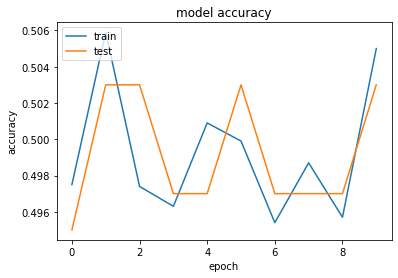

In [58]:
import matplotlib.pyplot as plt
%matplotlib inline
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [59]:
# to save it => model.save('mybrainmodel.h5')

In [60]:
model.load_weights('/Users/sabinkakotsur/Desktop/UPDATED_NLP_COURSE-3/06-Deep-Learning/chatbot_10.h5')
pred_results = model.predict(([inputs_test, queries_test]))

In [61]:
test_data[0][1]

['Is', 'John', 'in', 'the', 'kitchen', '?']

In [62]:
pred_results.shape

(1000, 38)

In [63]:
pred_results[0]

array([1.05296396e-19, 1.00813141e-19, 8.81571551e-20, 9.16647434e-20,
       1.11540174e-19, 9.11233020e-20, 9.99677777e-01, 1.12524843e-19,
       1.27608067e-19, 7.98185412e-20, 8.16531115e-20, 1.20010750e-19,
       1.32782043e-19, 1.04099827e-19, 9.04165924e-20, 1.14433394e-19,
       9.28418925e-20, 1.00945522e-19, 9.00022719e-20, 3.22204811e-04,
       8.91514197e-20, 9.90293198e-20, 8.69587578e-20, 1.18228162e-19,
       8.18536446e-20, 8.78275300e-20, 7.52335695e-20, 1.15246474e-19,
       1.00267764e-19, 1.13298412e-19, 1.18052399e-19, 1.01615461e-19,
       8.70317629e-20, 9.43489186e-20, 9.22685077e-20, 9.16490075e-20,
       7.85579955e-20, 1.07749846e-19], dtype=float32)

In [64]:
val_max=np.argmax(pred_results[0])

In [65]:
for key,val in tokenizer.word_index.items():
    if val == val_max:
        k=key

In [66]:
k

'took'

In [67]:
pred_results[0][val_max]

0.9996778

In [68]:
#stick to the voc that our model was trained on
my_story= "John left the kitchen . Sandra dropped the football in the garden ."

In [69]:
my_story.split()

['John',
 'left',
 'the',
 'kitchen',
 '.',
 'Sandra',
 'dropped',
 'the',
 'football',
 'in',
 'the',
 'garden',
 '.']

In [70]:
my_question = "Is the football in the garden ?"

In [71]:
my_question.split()

['Is', 'the', 'football', 'in', 'the', 'garden', '?']

In [72]:
mydata=[(my_story.split(), my_question.split(), 'yes')]

In [73]:
mydata

[(['John',
   'left',
   'the',
   'kitchen',
   '.',
   'Sandra',
   'dropped',
   'the',
   'football',
   'in',
   'the',
   'garden',
   '.'],
  ['Is', 'the', 'football', 'in', 'the', 'garden', '?'],
  'yes')]

In [74]:
my_story, my_ques, my_ans = vectorize_stories(mydata)

In [75]:
my_ans

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 1., 0., 0., 0., 0.]])

In [76]:
pred_results = model.predict(([my_story, my_ques]))

In [77]:
val_max=np.argmax(pred_results[0])

In [78]:
for key,val in tokenizer.word_index.items():
    if val == val_max:
        k=key
        
print("Predicted answer is: ", k)
print("Probability of certainty was: ", pred_results[0][val_max])

Predicted answer is:  took
Probability of certainty was:  0.50628316


In [79]:
k

'took'

In [80]:
pred_results[0][val_max]

0.50628316